In [1]:
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sys.path.append('../../..')
from src import lighten
import matplotlib.transforms as transforms
%matplotlib widget

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
df = pd.read_csv('df_2cellASI.csv')
df = df[df.Genotype.isin(['WT', 'C56S', 'L109R'])]
df_ctrl = df[df.Condition == 'ctrl']
df_nop1 = df[df.Condition == '36hrnop1']

### For paper

In [3]:
def dataplot(data, x, y, ax, order, width=0.3, linewidth=1, transform=None, offset=0, color=None,
             hue=None, palette=None):
    df_mean = [data[data[x] == o][y].mean() for o in order]
    [ax.hlines(y, i + offset - width/2, i + offset + width/2, zorder=100, color='k', 
               linewidth=2) for i, y in enumerate(df_mean)]
    sns.swarmplot(data=data, x=x, y=y, ax=ax, order=order, linewidth=linewidth, transform=transform, color=color,
                  hue=hue, palette=palette)

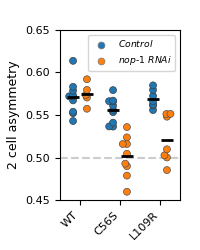

In [4]:
palette1 = {'WT':'tab:blue', 'C56S':'tab:orange', 'L109R':'tab:green'}
palette2 = {_: lighten(__, 1.7) for _, __ in palette1.items()}

fig, ax = plt.subplots()
fig.set_size_inches(3, 2.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

order = ['WT', 'C56S', 'L109R']

dataplot(data=df_ctrl, x='Genotype', y='Two cell asymmetry', ax=ax, order=order, color='tab:blue', 
              transform=trans+offset(-5), linewidth=0.5, offset=-0.17)
dataplot(data=df_nop1, x='Genotype', y='Two cell asymmetry', ax=ax, order=order, color='tab:orange', 
              transform=trans+offset(5), linewidth=0.5, offset=0.17)
dot1 = ax.scatter(x=[], y=[], linewidth=0.5, edgecolors='gray', color='tab:blue', s=25)
dot2 = ax.scatter(x=[], y=[], linewidth=0.5, edgecolors='gray', color='tab:orange', s=25)
ax.legend([dot1, dot2], [r'$Control$', r'$nop$' + '-' + r'$1\ RNAi$'], fontsize=6.7)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0.45, 0.65)
ax.set_ylabel('2 cell asymmetry', fontsize=9)
ax.axhline(0.5, c='0.8', linestyle='--', zorder=0)
fig.set_size_inches(2, 2.5)
fig.subplots_adjust(left=0.3, bottom=0.2)
fig.savefig('Figs/2cell_nop1.png', dpi=600, transparent=True)